CODING ASSIGNMENT PREDICTION AND REGRESSION


# Linear Regression


In [1]:
# Let's load and inspect the dataset that the user uploaded to understand its structure and proceed with data cleaning and analysis.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'Flight_delay.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

ModuleNotFoundError: No module named 'pandas'

In [3]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display the missing values for each column
missing_values[missing_values > 0]

NameError: name 'data' is not defined

In [4]:
# Remove rows with missing values in 'Org_Airport' and 'Dest_Airport'
data_cleaned = data.dropna(subset=['Org_Airport', 'Dest_Airport'])

# Check if missing values are removed
missing_values_cleaned = data_cleaned.isnull().sum()

# Displaying the cleaned data and the missing values count
missing_values_cleaned[missing_values_cleaned > 0]

NameError: name 'data' is not defined

In [5]:
# Extract delay-related features

# Convert 'CRSArrTime', 'ArrTime', 'DepTime' to minutes from midnight (if these are not NaN or missing)
def convert_to_minutes(time):
    """Convert time in HHMM format to minutes from midnight."""
    if pd.isnull(time):
        return None
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# Create delay-related features
data_cleaned['DepTimeMinutes'] = data_cleaned['DepTime'].apply(convert_to_minutes)
data_cleaned['ArrTimeMinutes'] = data_cleaned['ArrTime'].apply(convert_to_minutes)
data_cleaned['CRSArrTimeMinutes'] = data_cleaned['CRSArrTime'].apply(convert_to_minutes)

# Calculate arrival and departure delays
data_cleaned['ArrivalDelay'] = data_cleaned['ArrTimeMinutes'] - data_cleaned['CRSArrTimeMinutes']
data_cleaned['DepartureDelay'] = data_cleaned['DepTimeMinutes'] - data_cleaned['CRSArrTimeMinutes']

# Check the newly created delay-related columns
data_cleaned[['DepTime', 'ArrTime', 'CRSArrTime', 'ArrivalDelay', 'DepartureDelay']].head()


NameError: name 'data_cleaned' is not defined

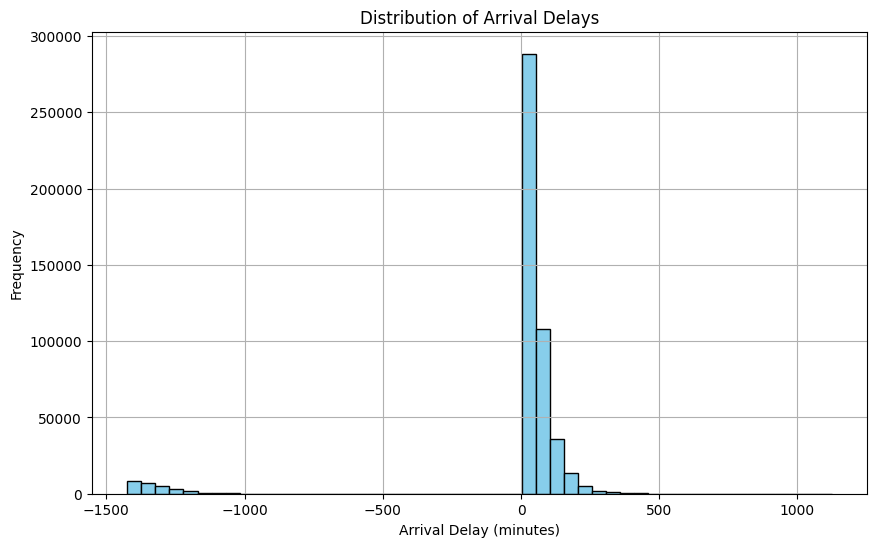

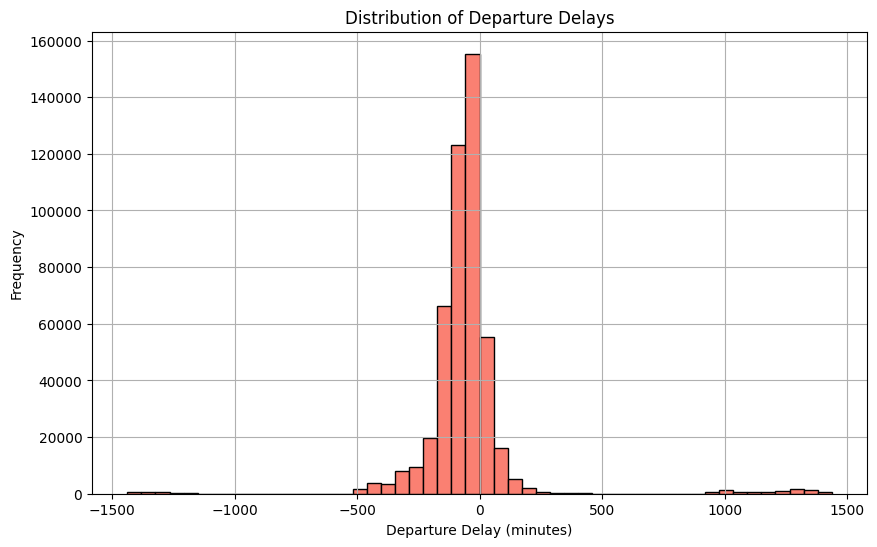

In [ ]:
import matplotlib.pyplot as plt

# Visualizing distribution of Arrival Delay
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['ArrivalDelay'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualizing distribution of Departure Delay
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['DepartureDelay'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Setting up the target variable
# We will define the target as a binary variable: 1 if ArrivalDelay > 15 minutes, 0 otherwise.

delay_threshold = 15  # Define the threshold for what is considered "delayed"
data_cleaned['Delayed'] = (data_cleaned['ArrivalDelay'] > delay_threshold).astype(int)

# Checking the distribution of the target variable
data_cleaned['Delayed'].value_counts()


C:\Users\nicka\AppData\Local\Temp\ipykernel_29620\2340812039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Delayed'] = (data_cleaned['ArrivalDelay'] > delay_threshold).astype(int)


Delayed
1    441806
0     40089
Name: count, dtype: int64

In [ ]:
# Step 1: Select relevant features and encode categorical variables (one-hot encoding for simplicity)
# For simplicity, let's start with a few key features and exclude highly cardinal features like 'FlightNum' and 'TailNum'
features = ['DepTimeMinutes', 'CRSArrTimeMinutes', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']
X = data_cleaned[features]
y = data_cleaned['Delayed']

# Step 2: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model with class weighting
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = logreg.predict(X_test)

# Step 5: Print the classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, confusion_mat


('              precision    recall  f1-score   support\n\n           0       0.18      0.75      0.29      7970\n           1       0.97      0.69      0.80     88409\n\n    accuracy                           0.69     96379\n   macro avg       0.57      0.72      0.55     96379\nweighted avg       0.90      0.69      0.76     96379\n',
 array([[ 5984,  1986],
        [27519, 60890]], dtype=int64))

In [ ]:
# Further reducing the sample size to 1,000 rows to avoid memory issues
data_sample_smaller = data_cleaned.sample(n=1000, random_state=42)

# Selecting the relevant features
features = ['DepTimeMinutes', 'CRSArrTimeMinutes', 'TaxiIn', 'TaxiOut', 
                   'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']
X_sample_smaller = data_sample_smaller[features]
y_sample_smaller = data_sample_smaller['Delayed']

# Splitting data into training and testing sets
X_train_sample_smaller, X_test_sample_smaller, y_train_sample_smaller, y_test_sample_smaller = train_test_split(X_sample_smaller, y_sample_smaller, test_size=0.2, random_state=42)

# Training logistic regression with class_weight='balanced'
logreg_sample_smaller = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_sample_smaller.fit(X_train_sample_smaller, y_train_sample_smaller)

# Predicting on the test set
y_pred_sample_smaller = logreg_sample_smaller.predict(X_test_sample_smaller)

# Evaluating the model using classification report and confusion matrix
classification_rep_sample_smaller = classification_report(y_test_sample_smaller, y_pred_sample_smaller, output_dict=True)
confusion_mat_sample_smaller = confusion_matrix(y_test_sample_smaller, y_pred_sample_smaller)

# Convert classification report to a DataFrame for better readability
classification_df = pd.DataFrame(classification_rep_sample_smaller).transpose()

# Display the confusion matrix
classification_df, confusion_mat_sample_smaller


(              precision    recall  f1-score  support
 0              0.176471  0.529412  0.264706    17.00
 1              0.946309  0.770492  0.849398   183.00
 accuracy       0.750000  0.750000  0.750000     0.75
 macro avg      0.561390  0.649952  0.557052   200.00
 weighted avg   0.880872  0.750000  0.799699   200.00,
 array([[  9,   8],
        [ 42, 141]], dtype=int64))

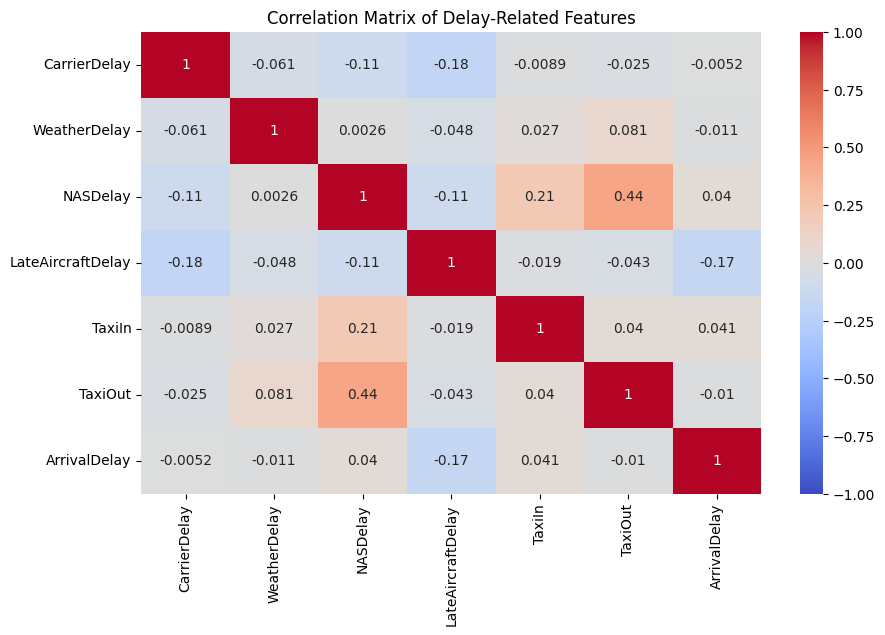

In [ ]:
# Visualizing correlations between delay-related features
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant delay-related features
delay_features = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut', 'ArrivalDelay']

# Compute correlation matrix
corr_matrix = data_cleaned[delay_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Delay-Related Features')
plt.show()
